In [1]:
import easyocr
import cv2
import os
import matplotlib.pyplot as plt
import supervision as sv
from ultralytics import YOLOv10
from matplotlib import pyplot as plt


In [2]:
%pip install -q git+https://github.com/THU-MIG/yolov10.git 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install spacy 

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     -------------------------------------- 125.2/125.2 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.1 MB 11.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/12.1 MB 7.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.1 MB 8.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/12.1 MB 8.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/12.1 MB 7.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/12.1 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/12.1 MB 7.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/12.1 MB 7.5 MB/s eta 0:00:02
   ---------- ----------------------------- 3.3/12.1 MB 7.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/12.1 MB 7.6 MB/s eta 0:00:02
   ---

In [13]:
!pip install -U spacy
!python -m spacy download fr_core_news_sm

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
     --------------------------------------- 0.0/16.3 MB 487.6 kB/s eta 0:00:34
     ---------------------------------------- 0.2/16.3 MB 1.4 MB/s eta 0:00:12
      --------------------------------------- 0.3/16.3 MB 2.3 MB/s eta 0:00:07
     - -------------------------------------- 0.6/16.3 MB 2.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/16.3 MB 3.5 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/16.3 MB 3.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/16.3 MB 3.9 MB/s eta 0:00:04
     --- ------------------------------------ 1.5/16.3 MB 4.1 MB/s eta 0:00:04
     ---- ----------------------------------- 1.8/16.3 MB 4.3 MB/s eta 0:00:04
     ----- ---------------------------------- 2.1/16.3 MB 4.6 MB/s eta 0:00:04
     ----- ---------------------------------- 2.3/16.3 MB 4.6 MB/


0: 480x640 (no detections), 406.2ms
Speed: 22.8ms preprocess, 406.2ms inference, 25.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 406.9ms
Speed: 7.4ms preprocess, 406.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 360.0ms
Speed: 6.0ms preprocess, 360.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 286.9ms
Speed: 0.0ms preprocess, 286.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 237.0ms
Speed: 6.2ms preprocess, 237.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 272.5ms
Speed: 4.0ms preprocess, 272.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 268.3ms
Speed: 6.3ms preprocess, 268.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 281.7ms
Speed: 3.4ms pre

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



0: 480x640 1 etiquette, 247.9ms
Speed: 4.0ms preprocess, 247.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


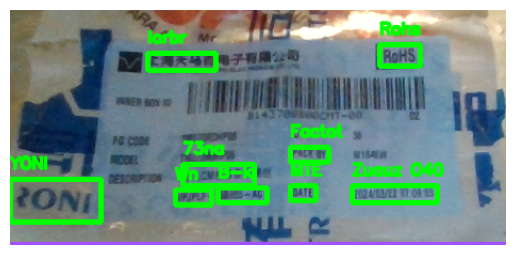

Textes détectés :  Iarbr Rohs  Factot 73na YONI Wn B-k MTE Zuauz O40
Texte nettoyé : 'Iarbr Rohs Factot 73na YONI Wn B-k MTE Zuauz O40'
Aucune date de fabrication trouvée.
Date de fabrication : None


In [2]:
import easyocr
import cv2
import os
import matplotlib.pyplot as plt
import supervision as sv
from ultralytics import YOLOv10
import re
from datetime import datetime


def clean_text(text):
    # Enlever les caractères non imprimables et les espaces supplémentaires
    cleaned_text = re.sub(r'\s+', ' ', text)  # Remplacer les espaces multiples par un seul espace
    cleaned_text = cleaned_text.strip()  # Enlever les espaces au début et à la fin
    return cleaned_text


def extract_manufacturing_date(text):
    # Nettoyer et afficher le texte original
    cleaned_text = clean_text(text)
    print(f"Texte nettoyé : '{cleaned_text}'")

    # Rechercher des dates sous différents formats
    date_patterns = [
        r'\b(\d{2})[/.-]\s*(\d{2})[/.-]\s*(\d{4})\b',   # DD/MM/YYYY, DD.MM.YYYY, DD-MM-YYYY
        r'\b(\d{4})[/.-]\s*(\d{2})[/.-]\s*(\d{2})\b',   # YYYY/MM/DD, YYYY.MM.DD, YYYY-MM-DD
        r'\b(\d{8})\b',                                # YYYYMMDD
        r'\b(\d{6})\b',                                 # YYMMDD
        r'\b(\d{8})\b',                                # DDMMYYYY (no separation)
        r'\b(\d{4})(\d{2})(\d{2})\b',                    # No separation format (YYYYMMDD)
        r'\b(\d{2})[/.-]\s*(\d{2})[/.-]\s*(\d{2})\b',   # DD/MM/YY, DD.MM.YY, DD-MM-YY (last two digits for year)
    ]

    for pattern in date_patterns:
        match = re.search(pattern, cleaned_text)
        if match:
            if len(match.groups()) == 3:  # Vérifier s'il y a 3 groupes (jour, mois, année)
                day = match.group(1)
                month = match.group(2)
                year = match.group(3)
                if len(year) == 2:
                    # Convertir l'année à un format à quatre chiffres
                    if int(year) < 50:
                        year = f"20{year}"
                    else:
                        year = f"19{year}"
                # Formater la date comme DD/MM/YYYY
                date_str = f"{day}/{month}/{year}"
                print(f"Date extraite : '{date_str}'")
                return date_str  # Retourner la date formatée

    # Si aucune date n'est trouvée après avoir parcouru tous les patterns
    print("Aucune date de fabrication trouvée.")
    return None  # Retourner None si aucune date n'est trouvée

#extraction de texte
def process_image_and_extract_text(image):
    reader = easyocr.Reader(['en'], gpu=True)

    # Obtenir les détections de YOLO
    results = model(image)[0]
    detections = sv.Detections.from_ultralytics(results)
    
    # Liste pour stocker les textes détectés
    detected_texts = []

    for bbox in detections.xyxy:  # bbox[0]: xmin, bbox[1]: ymin, bbox[2]: xmax, bbox[3]: ymax
        x_min, y_min, x_max, y_max = map(int, bbox)
        cropped_img = image[y_min:y_max, x_min:x_max]  # Recadrer l'image à l'intérieur de la boîte

        # Extraire le texte de l'image recadrée
        results = reader.readtext(cropped_img)

        # Trier les résultats par la position y des boîtes de délimitation
        sorted_results = sorted(results, key=lambda x: x[0][0][1])

        # Grouper les résultats par lignes avec une tolérance pour les positions y
        tolerance = 10  # ajustez la tolérance selon vos besoins
        lines = []
        current_line = []

        for result in sorted_results:
            if not current_line:
                current_line.append(result)
            else:
                last_y = current_line[-1][0][0][1]
                current_y = result[0][0][1]
                if abs(current_y - last_y) < tolerance:
                    current_line.append(result)
                else:
                    lines.append(current_line)
                    current_line = [result]

        # Ajouter la dernière ligne
        if current_line:
            lines.append(current_line)

        # Trier les textes dans chaque ligne par la position x et les afficher
        for line in lines:
            sorted_line = sorted(line, key=lambda x: x[0][0][0])
            for result in sorted_line:
                top_left = tuple(map(int, result[0][0]))
                bottom_right = tuple(map(int, result[0][2]))
                text = result[1]

                # Ajouter le texte détecté à la liste
                detected_texts.append(text)

                # Dessiner les rectangles et le texte sur l'image recadrée
                cropped_img = cv2.rectangle(cropped_img, top_left, bottom_right, (0, 255, 0), 3)
                cropped_img = cv2.putText(cropped_img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        # Afficher l'image recadrée avec le texte détecté
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    # Concaténer tous les textes détectés 
    all_detected_text = " ".join(detected_texts)
    return image, all_detected_text


# Charger le modèle YOLO
model = YOLOv10(r'C:\Users\CBE\Downloads\best (1).pt')
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
# Ouvre le flux vidéo 
cap = cv2.VideoCapture(1)

# Vérifie si le flux vidéo a été ouvert correctement
if not cap.isOpened():
    print("Unable to read camera feed")

img_counter = 0
image = None  # Variable pour stocker l'image capturée

# Boucle infinie pour capturer les images de la webcam
while True:
    # Capture une image de la webcam
    ret, frame = cap.read()

    # Vérifie si la capture a réussi
    if not ret:
        break

    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    
    annotated_image = bounding_box_annotator.annotate(
        scene=frame, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    cv2.imshow('webcam', annotated_image)

    k = cv2.waitKey(1)

    # Si la touche 's' est appuyée (code 115), capture l'image, arrête le flux et ferme la caméra
    if k % 256 == 115:
        print("Image captured")
        image = frame  # Stocke l'image capturée
        cap.release()  # Libère le flux vidéo
        cv2.destroyAllWindows()  # Ferme toutes les fenêtres
        #cv2.imshow('Captured Image', image)
        processed_img, detected_text = process_image_and_extract_text(image)
        print("Textes détectés : ", detected_text)
        break
    elif k % 256 == 27:
        print("Escape hit, closing...")
        cap.release()  # Libère le flux vidéo
        cv2.destroyAllWindows()  # Ferme toutes les fenêtres
        break
manufacturing_date = extract_manufacturing_date(detected_text)
print(f"Date de fabrication : {manufacturing_date}") 


In [29]:
import re
from datetime import datetime

def clean_text(text):
    # Enlever les caractères non imprimables et les espaces supplémentaires
    cleaned_text = re.sub(r'\s+', ' ', text)  # Remplacer les espaces multiples par un seul espace
    cleaned_text = cleaned_text.strip()  # Enlever les espaces au début et à la fin
    return cleaned_text
import re

def extract_manufacturing_date(text):
    # Nettoyer et afficher le texte original
    cleaned_text = clean_text(text)
    print(f"Texte nettoyé : '{cleaned_text}'")

    # Rechercher des dates sous différents formats
    date_patterns = [
        r'\b(\d{2})[/.-]\s*(\d{2})[/.-]\s*(\d{4})\b',   # DD/MM/YYYY, DD.MM.YYYY, DD-MM-YYYY
        r'\b(\d{4})[/.-]\s*(\d{2})[/.-]\s*(\d{2})\b',   # YYYY/MM/DD, YYYY.MM.DD, YYYY-MM-DD
        r'\b(\d{8})\b',                                # YYYYMMDD
        r'\b(\d{6})\b',                                 # YYMMDD
        r'\b(\d{8})\b',                                # DDMMYYYY (no separation)
        r'\b(\d{4})(\d{2})(\d{2})\b',                    # No separation format (YYYYMMDD)
        r'\b(\d{2})[/.-]\s*(\d{2})[/.-]\s*(\d{2})\b',   # DD/MM/YY, DD.MM.YY, DD-MM-YY (last two digits for year)
    ]

    for pattern in date_patterns:
        match = re.search(pattern, cleaned_text)
        if match:
            if len(match.groups()) == 3:  # Vérifier s'il y a 3 groupes (jour, mois, année)
                day = match.group(1)
                month = match.group(2)
                year = match.group(3)
                if len(year) == 2:
                    # Convertir l'année à un format à quatre chiffres
                    if int(year) < 50:
                        year = f"20{year}"
                    else:
                        year = f"19{year}"
                # Formater la date comme DD/MM/YYYY
                date_str = f"{day}/{month}/{year}"
                print(f"Date extraite : '{date_str}'")
                return date_str  # Retourner la date formatée

    # Si aucune date n'est trouvée après avoir parcouru tous les patterns
    print("Aucune date de fabrication trouvée.")
    return None  # Retourner None si aucune date n'est trouvée


text = ' 20/02/2024'
manufacturing_date = extract_manufacturing_date(text)
print(f"Date de fabrication : {manufacturing_date}") 


Texte nettoyé : '20/02/2024'
Date extraite : '20/02/2024'
Date de fabrication : 20/02/2024


In [2]:
cap.release()